In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o dataset
file_path = './soybean-large.csv'
df = pd.read_csv(file_path, na_values='?')
print(df.head())

                   class  date  plant-stand  precip  temp  hail  crop-hist  \
0  diaporthe-stem-canker   6.0          0.0     2.0   1.0   0.0        1.0   
1  diaporthe-stem-canker   4.0          0.0     2.0   1.0   0.0        2.0   
2  diaporthe-stem-canker   3.0          0.0     2.0   1.0   0.0        1.0   
3  diaporthe-stem-canker   3.0          0.0     2.0   1.0   0.0        1.0   
4  diaporthe-stem-canker   6.0          0.0     2.0   1.0   0.0        2.0   

   area-damaged  severity  seed-tmt  ...  int-discolor  sclerotia  fruit-pods  \
0           1.0       1.0       0.0  ...           0.0        0.0         0.0   
1           0.0       2.0       1.0  ...           0.0        0.0         0.0   
2           0.0       2.0       1.0  ...           0.0        0.0         0.0   
3           0.0       2.0       0.0  ...           0.0        0.0         0.0   
4           0.0       1.0       0.0  ...           0.0        0.0         0.0   

   fruit-spots  seed  mold-growth  seed-disc

In [29]:
# Informações sobre o dataset
print(df.info())
# Estatísticas descritivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            307 non-null    object 
 1   date             306 non-null    float64
 2   plant-stand      299 non-null    float64
 3   precip           296 non-null    float64
 4   temp             300 non-null    float64
 5   hail             266 non-null    float64
 6   crop-hist        306 non-null    float64
 7   area-damaged     306 non-null    float64
 8   severity         266 non-null    float64
 9   seed-tmt         266 non-null    float64
 10  germination      271 non-null    float64
 11  plant-growth     306 non-null    float64
 12  leaves           307 non-null    int64  
 13  leafspots-halo   282 non-null    float64
 14  leafspots-marg   282 non-null    float64
 15  leafspot-size    282 non-null    float64
 16  leaf-shread      281 non-null    float64
 17  leaf-malf       

In [30]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
missing_values_count = df.isnull().sum(axis=1)
rows_with_missing_values = missing_values_count[missing_values_count > 0].count()
print('Linhas com algum atributo faltante', rows_with_missing_values)
print(missing_values)

Linhas com algum atributo faltante 41
class               0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external-decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit-spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64


In [31]:
# Remover colunas com mais valores ausentes
df_clean = df.drop(
    columns=[
        'hail',
        'severity',
        'seed-tmt',
        'germination',
        'leaf-mild',
        'lodging',
        'fruiting-bodies',
        'fruit-spots',
        'seed-discolor',
        'shriveling',
    ]
)
# Remover linhas com valores ausentes
initial_row_count = df_clean.shape[0]
df_clean = df_clean.dropna()
final_row_count = df_clean.shape[0]
removed_rows = initial_row_count - final_row_count
print(f'Foram removidas {removed_rows} linhas')

Foram removidas 41 linhas


In [32]:
# Verificar valores ausentes
missing_values = df_clean.isnull().sum()
print(missing_values)

class             0
date              0
plant-stand       0
precip            0
temp              0
crop-hist         0
area-damaged      0
plant-growth      0
leaves            0
leafspots-halo    0
leafspots-marg    0
leafspot-size     0
leaf-shread       0
leaf-malf         0
stem              0
stem-cankers      0
canker-lesion     0
external-decay    0
mycelium          0
int-discolor      0
sclerotia         0
fruit-pods        0
seed              0
mold-growth       0
seed-size         0
roots             0
dtype: int64


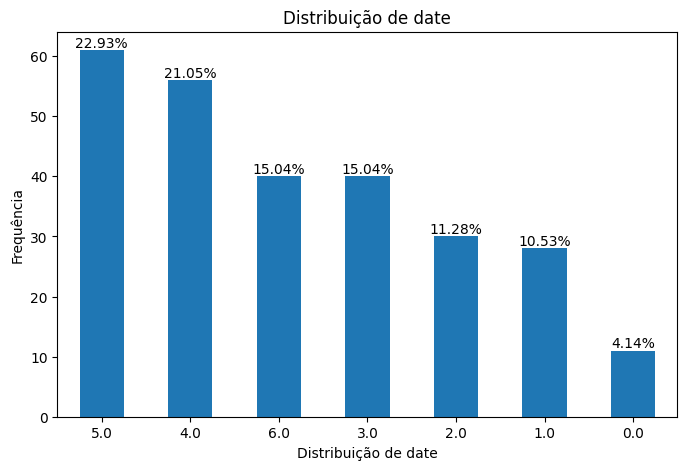

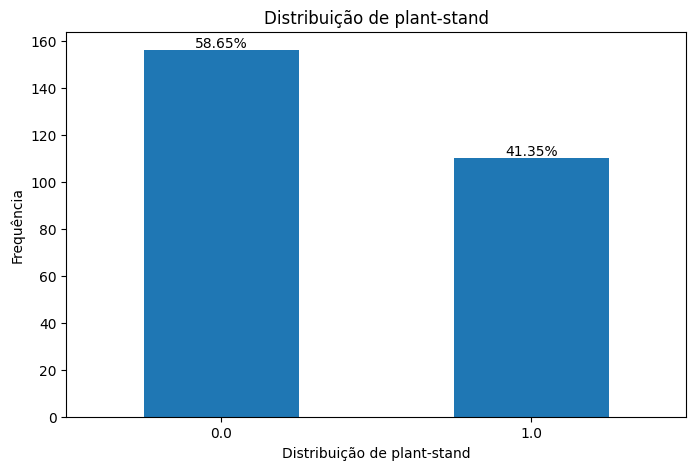

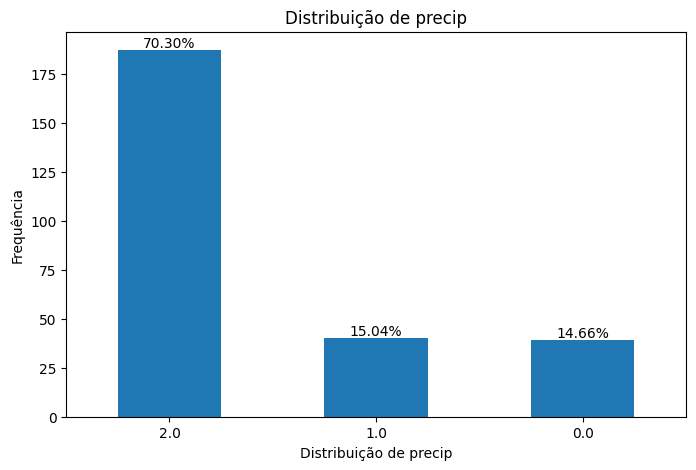

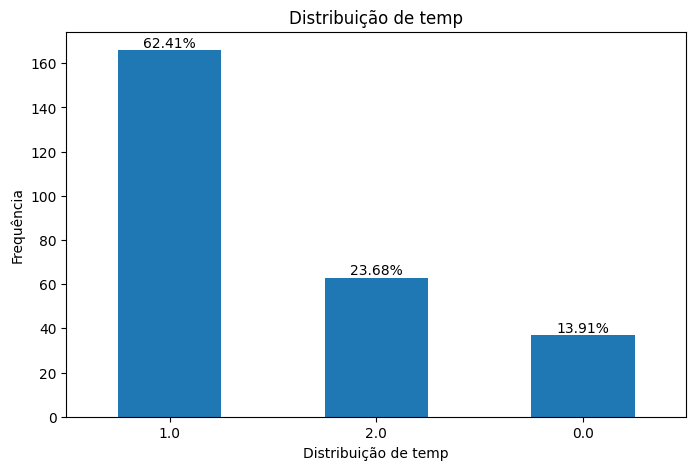

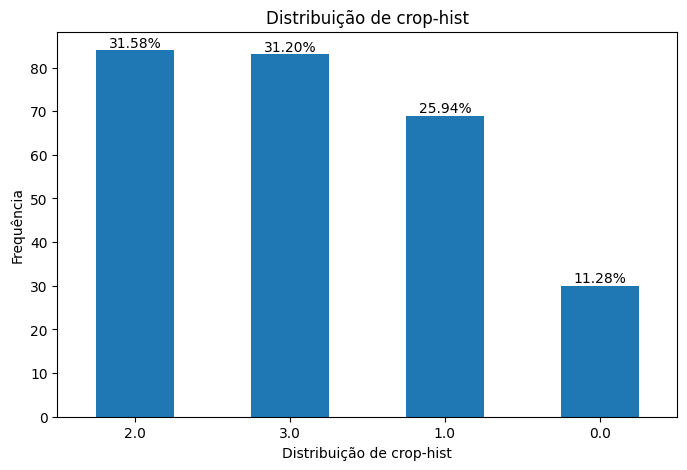

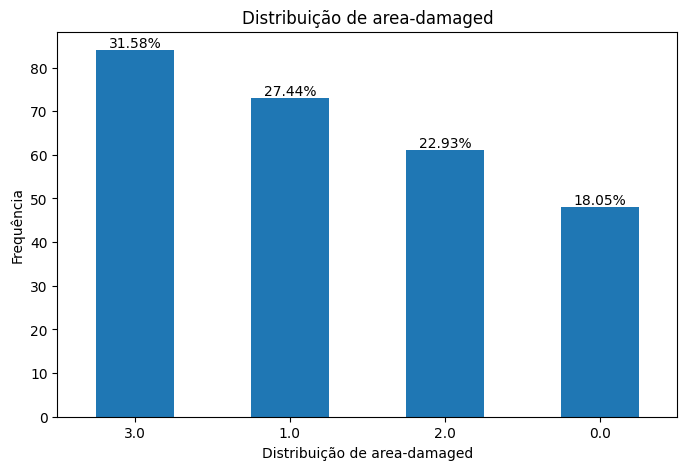

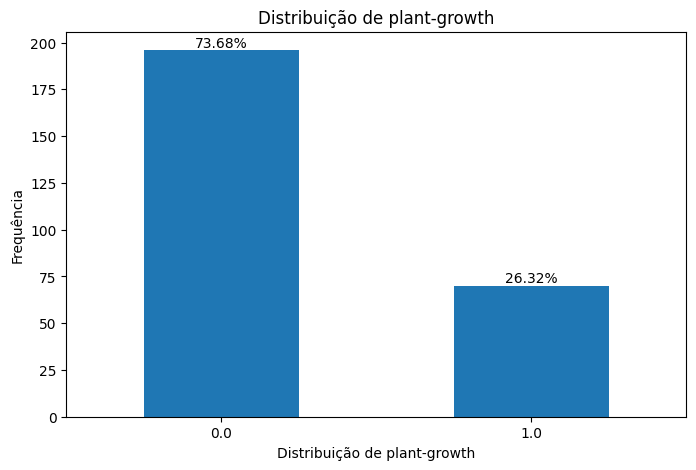

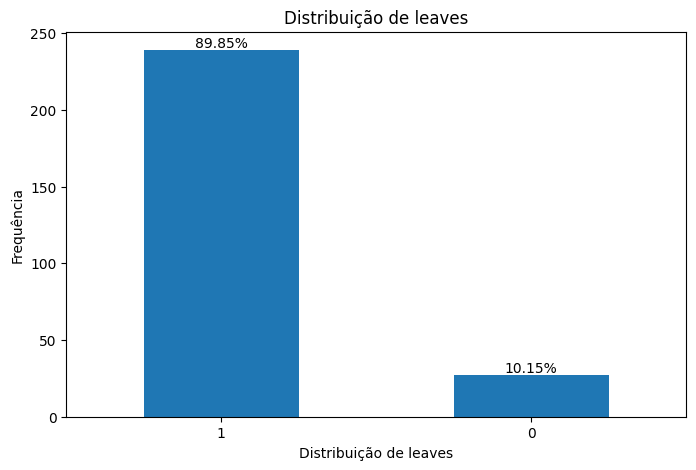

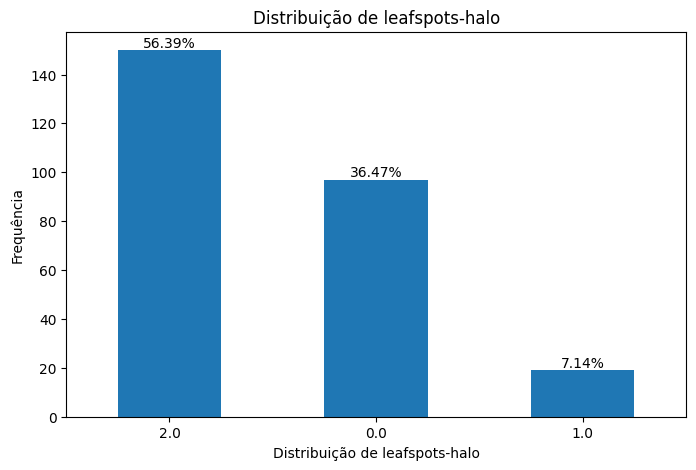

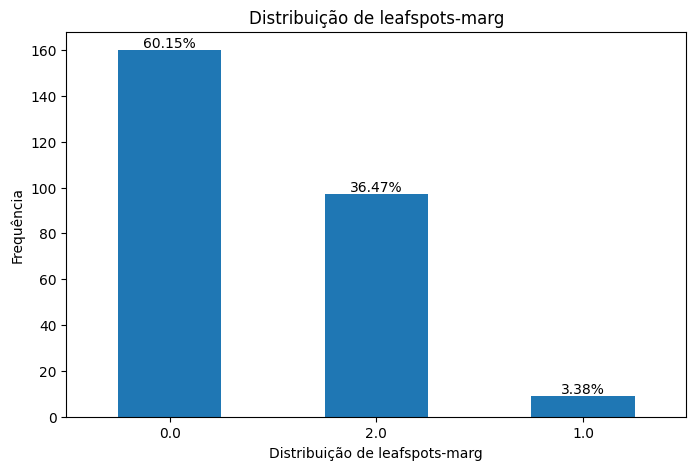

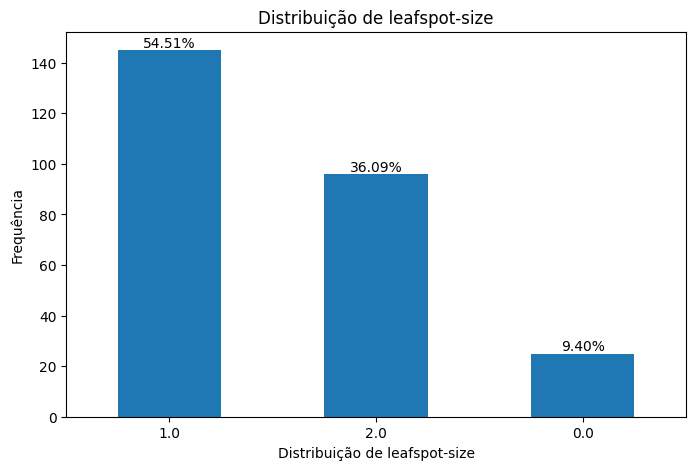

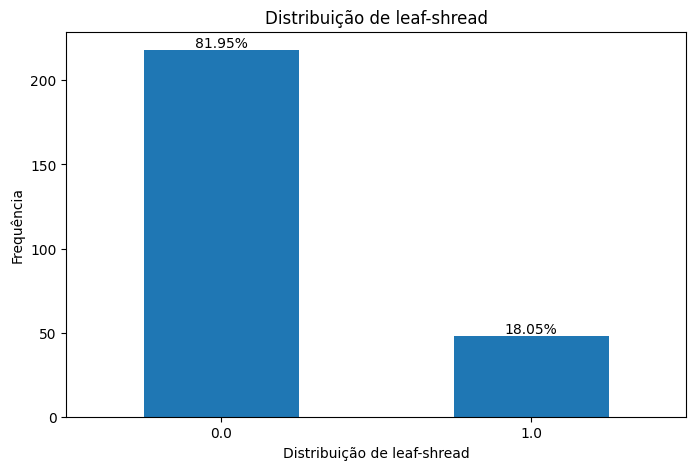

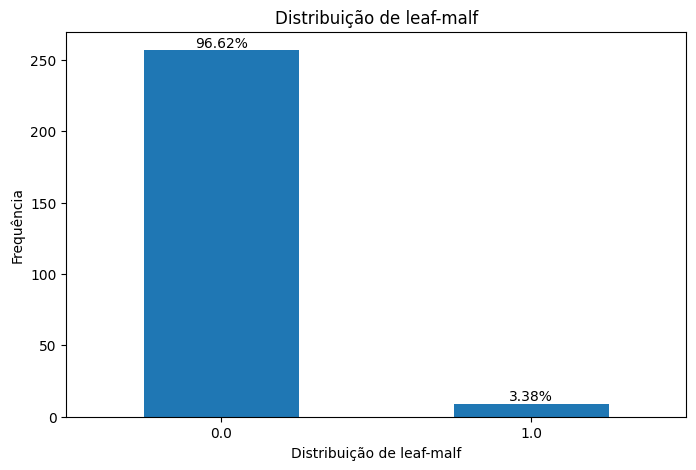

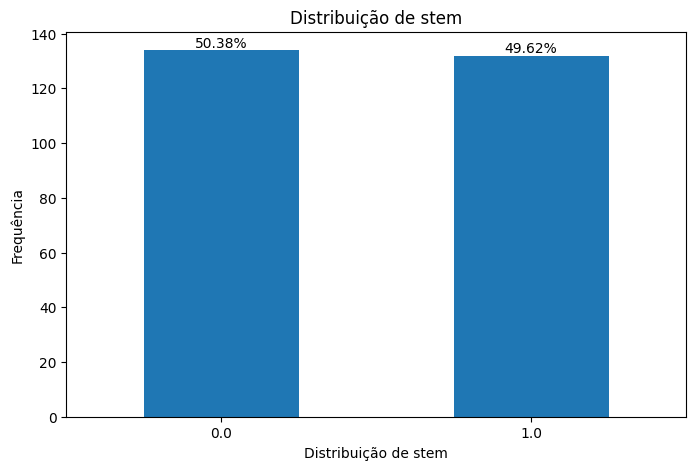

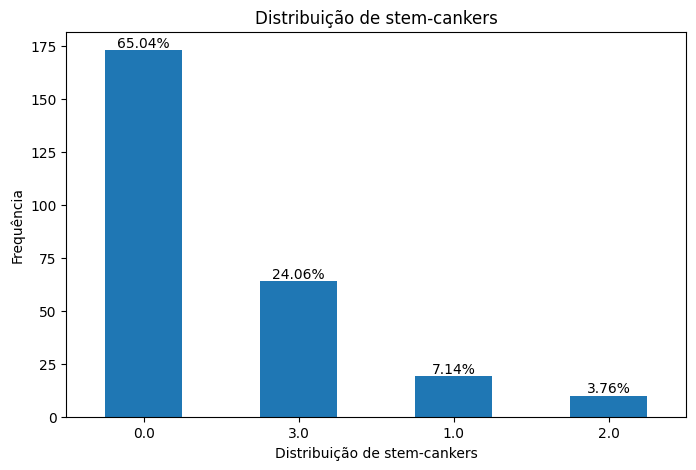

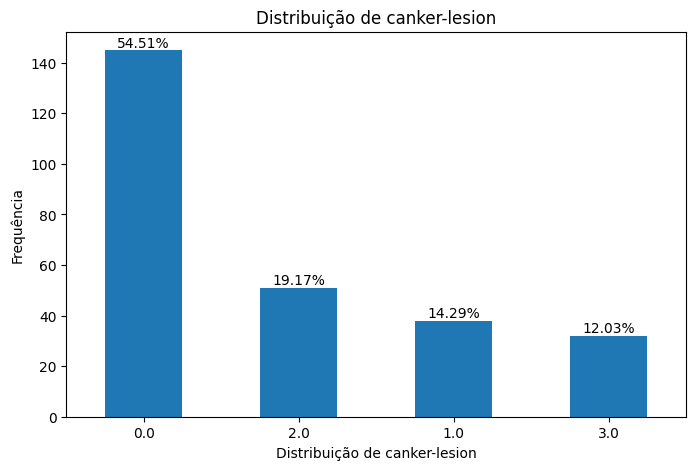

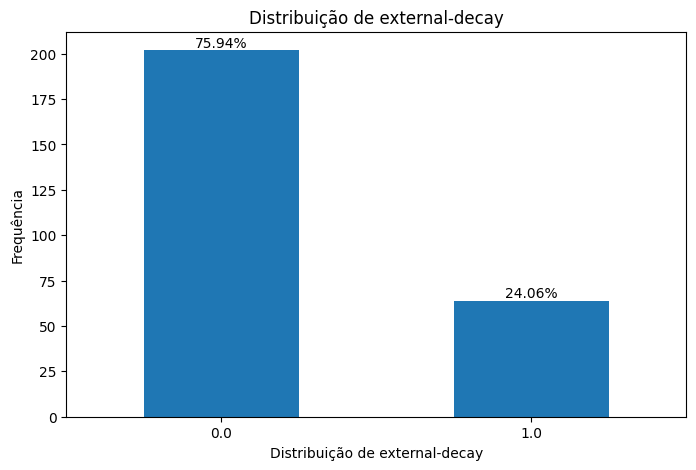

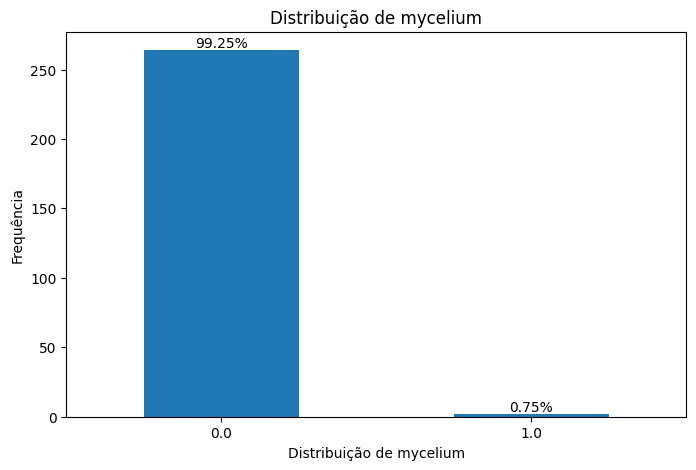

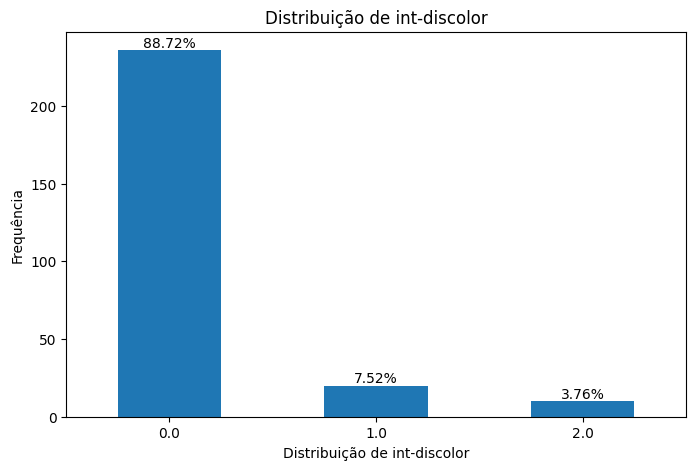

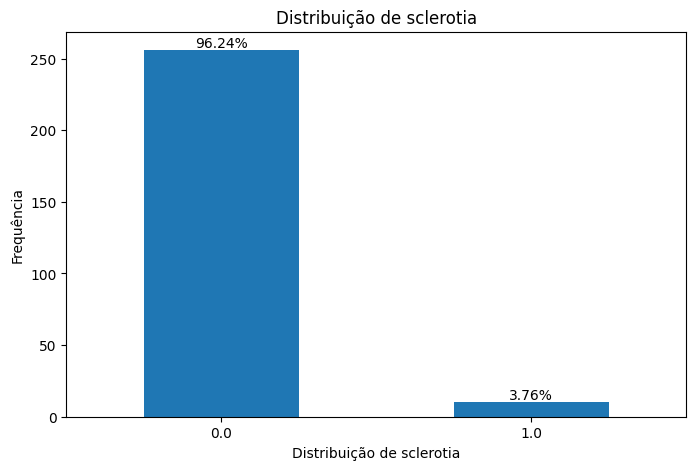

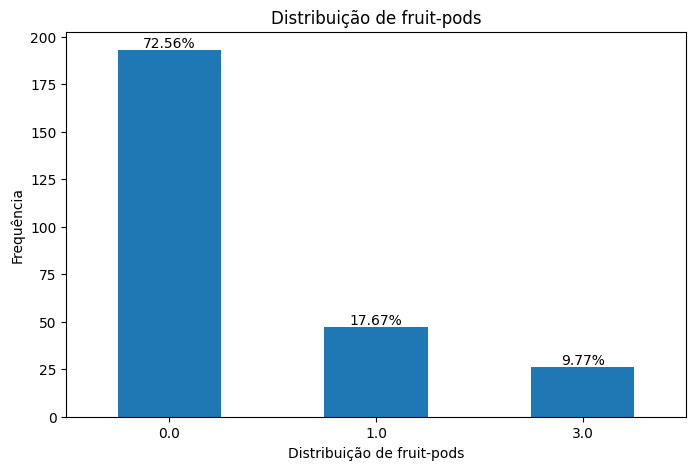

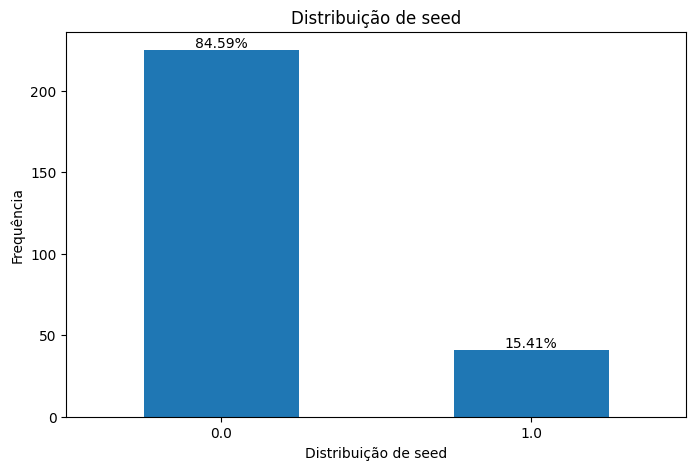

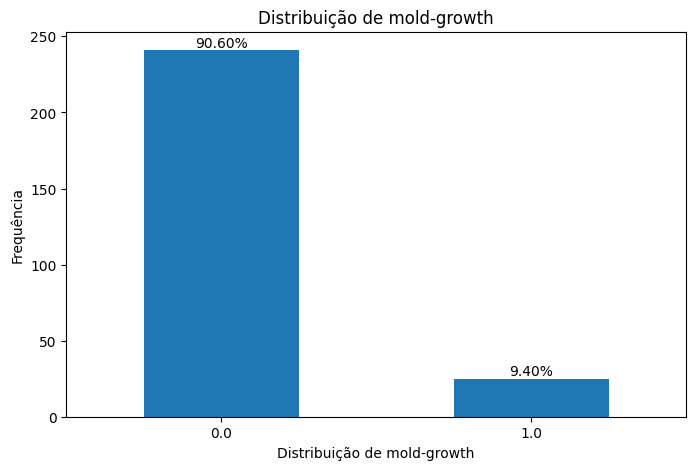

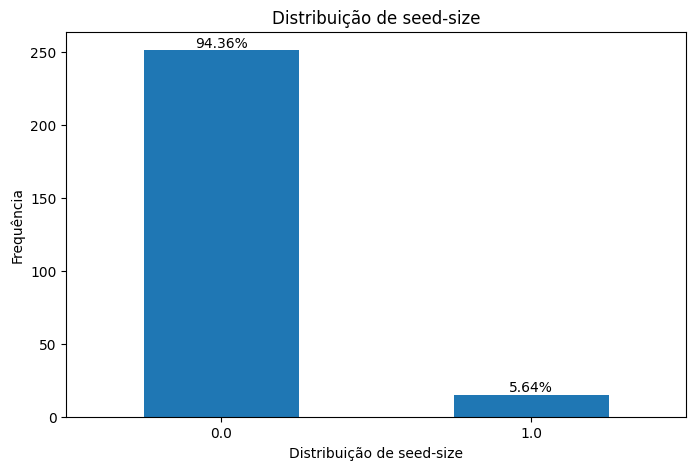

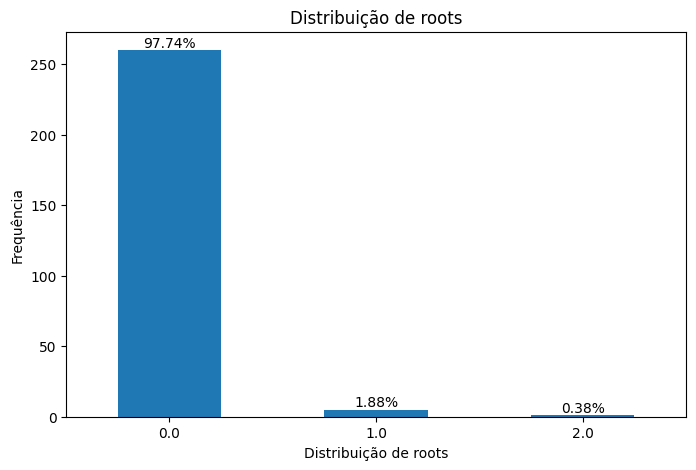

In [33]:
def show_dist_of(attribute, df, title=''):
    # Calcular a contagem de valores e a porcentagem
    temp_value_counts = df[attribute].value_counts()
    temp_percentages = (temp_value_counts / temp_value_counts.sum()) * 100

    # Plotar o gráfico de barras
    plt.figure(figsize=(8, 5))
    bars = temp_value_counts.plot(kind='bar')

    # Adicionar as porcentagens em cima de cada barra
    for bar, percentage in zip(bars.patches, temp_percentages):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # posição x
            bar.get_height(),                   # posição y
            f'{percentage:.2f}%',               # texto
            ha='center',                        # alinhamento horizontal
            va='bottom'                         # alinhamento vertical
        )

    plt.title(f'Distribuição de {title}' if title else f'Distribuição de {attribute}')
    plt.xlabel(title if title else f'Distribuição de {attribute}')
    plt.ylabel('Frequência')
    plt.xticks(rotation=0)
    plt.show()

attributes = df_clean.columns.to_list().copy()
attributes.pop(0) # removes the class attribute

for attr in attributes:
    show_dist_of(attr, df_clean)

In [34]:
# Remover colunas com baixa variabilidade
df_clean = df_clean.drop(columns=['roots', 'sclerotia','mycelium','leaf-malf'])

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar colunas numéricas
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
# Aplicar a normalização
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

df_clean.head()

,class,date,plant-stand,precip,temp,crop-hist,area-damaged,plant-growth,leaves,leafspots-halo,...,leaf-shread,stem,stem-cankers,canker-lesion,external-decay,int-discolor,fruit-pods,seed,mold-growth,seed-size
0,diaporthe-stem-canker,1.000000,0.0,1.0,0.5,0.333333,0.333333,1.0,1.0,0.0,...,0.0,1.0,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,0.666667,0.0,1.0,0.5,0.666667,0.000000,1.0,1.0,0.0,...,0.0,1.0,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,0.500000,0.0,1.0,0.5,0.333333,0.000000,1.0,1.0,0.0,...,0.0,1.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,0.500000,0.0,1.0,0.5,0.333333,0.000000,1.0,1.0,0.0,...,0.0,1.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,1.000000,0.0,1.0,0.5,0.666667,0.000000,1.0,1.0,0.0,...,0.0,1.0,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0


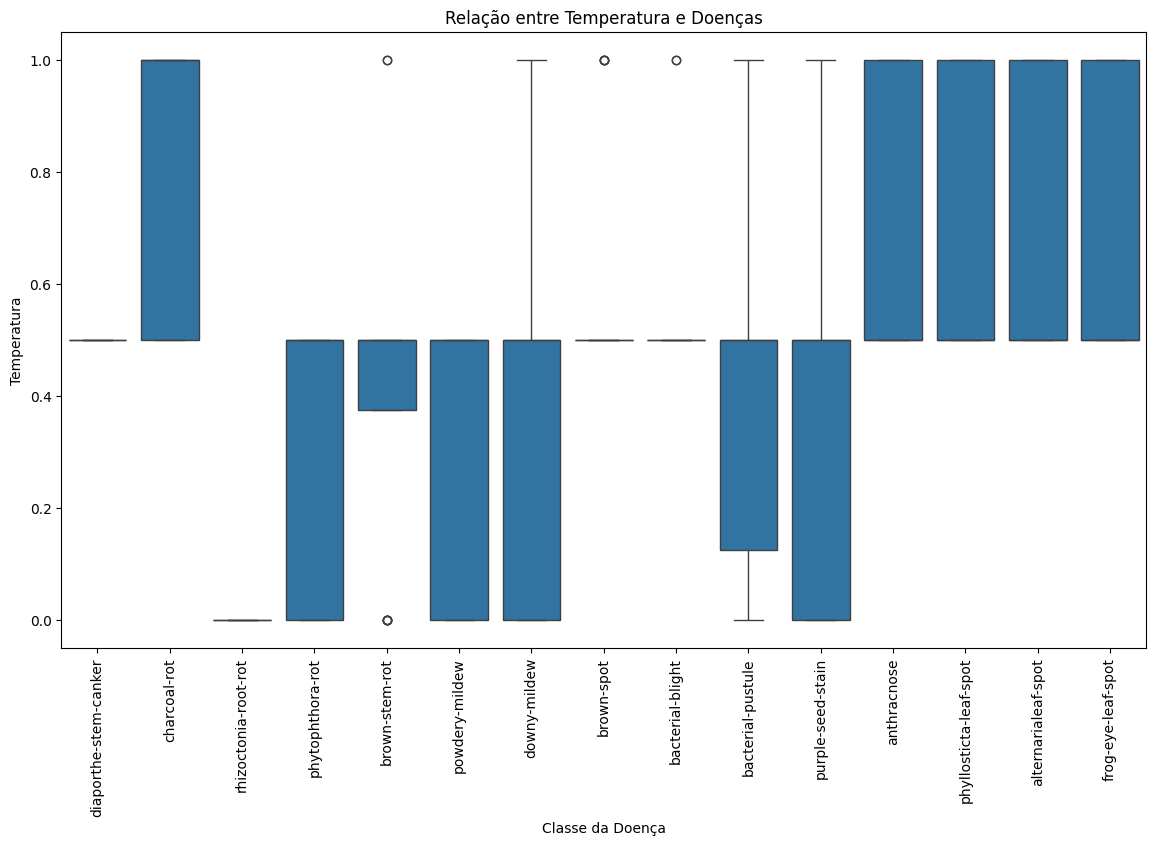

In [36]:
# Boxplot para visualizar a relação entre temperatura e doenças
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean, x='class', y='temp')
plt.title('Relação entre Temperatura e Doenças')
plt.xlabel('Classe da Doença')
plt.ylabel('Temperatura')
plt.xticks(rotation=90)
plt.show()